# Demo: Burger's Equation (PDE)

### created by Yuying Liu, 11/25/18

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from pySINDy.sindypde import SINDyPDE
import scipy.io as sio
import numpy as np

In [3]:
data = sio.loadmat('../datasets/burgers.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 't', 'x', 'usol'])

In [4]:
U = np.real(data['usol'])
t = np.real(data['t'].flatten())
x = np.real(data['x'].flatten())
dt = t[1] - t[0]
dx = x[1] - x[0]

In [5]:
model = SINDyPDE(name='SINDyPDE model for Burgers')

In [6]:
model.fit(U, dt, dx, space_deriv_order=2, cut_off=0.1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/findiff/findiff.py:242: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yd[ref_multi_slice] += w * y[off_multi_slice]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/findiff/findiff.py:240: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yd[ref_multi_slice] += y[off_multi_slice]


Progress: finished computing time derivatives  ...
Progress: finished computing spatial derivatives  ...
Progress: finished sparse regression  ...


In [7]:
model.coefficients

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.10018193],
       [-1.00113712],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ]])

In [8]:
model.descriptions

['1',
 'u',
 'u^{2}',
 'u_{x}',
 'u_{xx}',
 'uu_{x}',
 'uu_{xx}',
 'u^{2}u_{x}',
 'u^{2}u_{xx}']

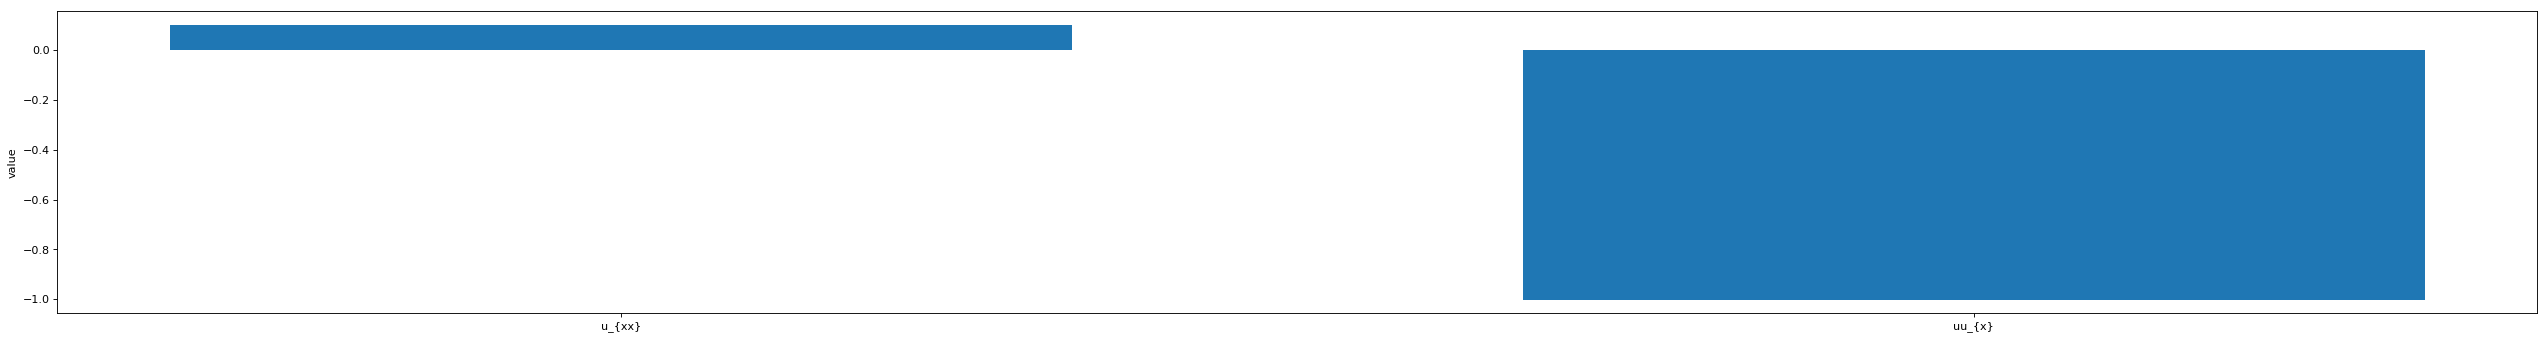

In [9]:
model.plot_coefficients